In [1]:
import numpy as np
import pandas as pd
import os 
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
metadata = pd.read_csv("metadata.csv")
metadata = metadata.drop(['technology'], axis=1)

sns.set_theme(style="whitegrid")

# Overview of all

## Training
There are 70919 samples in training set
## Testing
There are 48616 samples in test set

In [3]:
# Training Set
train_df = pd.read_hdf('./train_cite_inputs.h5', start= 0, stop = 1)
train_df = train_df.reset_index(level=0)
train_df = train_df['cell_id']
train_df = pd.merge(train_df, metadata, how='left',on='cell_id')

for i in range(70):
    train = pd.read_hdf('./train_cite_inputs.h5', start= 1024 * i + 1, stop=1024 * i + 1024)
    train = train.reset_index(level=0)
    train = train['cell_id']

    train = pd.merge(train, metadata, how='left',on='cell_id')

    train_df = pd.concat([train_df, train], ignore_index=True)
# Testing Set
test_df = pd.read_hdf('./test_cite_inputs.h5', start= 0, stop = 1)
test_df = test_df.reset_index(level=0)
test_df = test_df['cell_id']
test_df = pd.merge(test_df, metadata, how='left',on='cell_id')

for i in range(70):
    temp = pd.read_hdf('./test_cite_inputs.h5', start= 1024 * i + 1, stop=1024 * i + 1024)
    temp = temp.reset_index(level=0)
    temp = temp['cell_id']

    temp = pd.merge(temp, metadata, how='left',on='cell_id')

    test_df = pd.concat([test_df, temp], ignore_index=True)

In [4]:
train_df['donor'] = train_df['donor'].apply(lambda x: 1 if x == 13176 else x)
train_df['donor'] = train_df['donor'].apply(lambda x: 2 if x == 27678 else x)
train_df['donor'] = train_df['donor'].apply(lambda x: 3 if x == 31800 else x)
train_df['donor'] = train_df['donor'].apply(lambda x: 4 if x == 32606 else x)

test_df['donor'] = test_df['donor'].apply(lambda x: 1 if x == 13176 else x)
test_df['donor'] = test_df['donor'].apply(lambda x: 2 if x == 27678 else x)
test_df['donor'] = test_df['donor'].apply(lambda x: 3 if x == 31800 else x)
test_df['donor'] = test_df['donor'].apply(lambda x: 4 if x == 32606 else x)


In [5]:
day_df = test_df.set_index("cell_id")[["day"]].value_counts().to_frame()\
                .sort_values("day").reset_index()\
                .rename(columns={0:"# cells"})

donor_df = test_df.set_index("cell_id")[["donor"]].value_counts().to_frame()\
                .sort_values("donor").reset_index()\
                .rename(columns={0:"# cells"})

cell_type_df = test_df.set_index("cell_id")[["cell_type"]].value_counts().to_frame()\
                .sort_values("cell_type").reset_index()\
                .rename(columns={0:"# cells"})

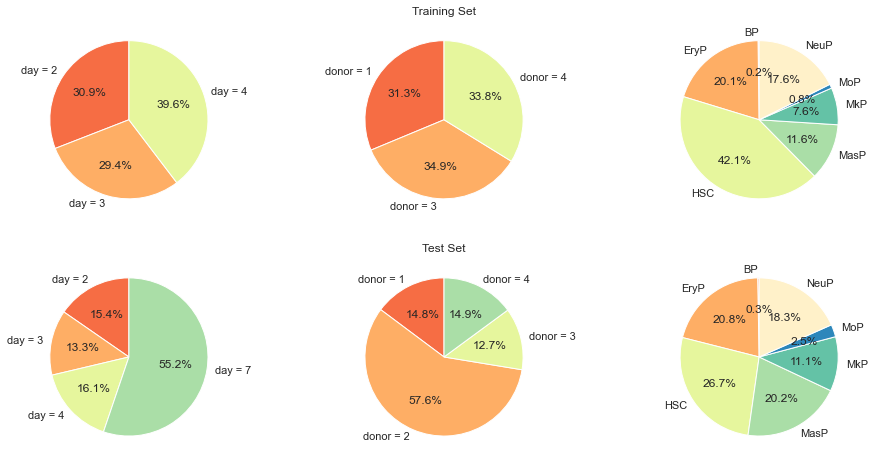

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(16,8), sharey=True)

colors = ['#F66D44', '#FEAE65', '#E6F69D', '#AADEA7', '#64C2A6', '#2D87BB', '#FFF1C9']
daylabels = ["day = 2", "day = 3", "day = 4"]
donorlabels = ["donor = 1",  "donor = 3", "donor = 4"]

day_df = train_df.set_index("cell_id")[["day"]].value_counts().to_frame()\
                .sort_values("day").reset_index()\
                .rename(columns={0:"# cells"})

donor_df = train_df.set_index("cell_id")[["donor"]].value_counts().to_frame()\
                .sort_values("donor").reset_index()\
                .rename(columns={0:"# cells"})

cell_type_df = train_df.set_index("cell_id")[["cell_type"]].value_counts().to_frame()\
                .sort_values("cell_type").reset_index()\
                .rename(columns={0:"# cells"})

axs[0][0].pie(day_df['# cells'], labels = daylabels, autopct='%1.1f%%', colors=colors, startangle=90)
axs[0][1].pie(donor_df['# cells'], labels = donorlabels, colors=colors, autopct='%1.1f%%', startangle=90)
axs[0][1].set_title("Training Set")
axs[0][2].pie(cell_type_df['# cells'], labels = cell_type_df['cell_type'], autopct='%1.1f%%', colors=colors, startangle=90)

day_df = test_df.set_index("cell_id")[["day"]].value_counts().to_frame()\
                .sort_values("day").reset_index()\
                .rename(columns={0:"# cells"})

donor_df = test_df.set_index("cell_id")[["donor"]].value_counts().to_frame()\
                .sort_values("donor").reset_index()\
                .rename(columns={0:"# cells"})

cell_type_df = test_df.set_index("cell_id")[["cell_type"]].value_counts().to_frame()\
                .sort_values("cell_type").reset_index()\
                .rename(columns={0:"# cells"})

daylabels = ["day = 2", "day = 3", "day = 4", "day = 7"]
donorlabels = ["donor = 1", "donor = 2", "donor = 3", "donor = 4"]

axs[1][0].pie(day_df['# cells'], labels = daylabels, autopct='%1.1f%%', colors=colors, startangle=90)
axs[1][1].pie(donor_df['# cells'], labels = donorlabels, colors=colors, autopct='%1.1f%%', startangle=90)
axs[1][1].set_title("Test Set")
axs[1][2].pie(cell_type_df['# cells'], labels = cell_type_df['cell_type'], autopct='%1.1f%%', colors=colors, startangle=90)


plt.show()

fig.savefig('./image/1.0.png')

# Day vs Cell Type

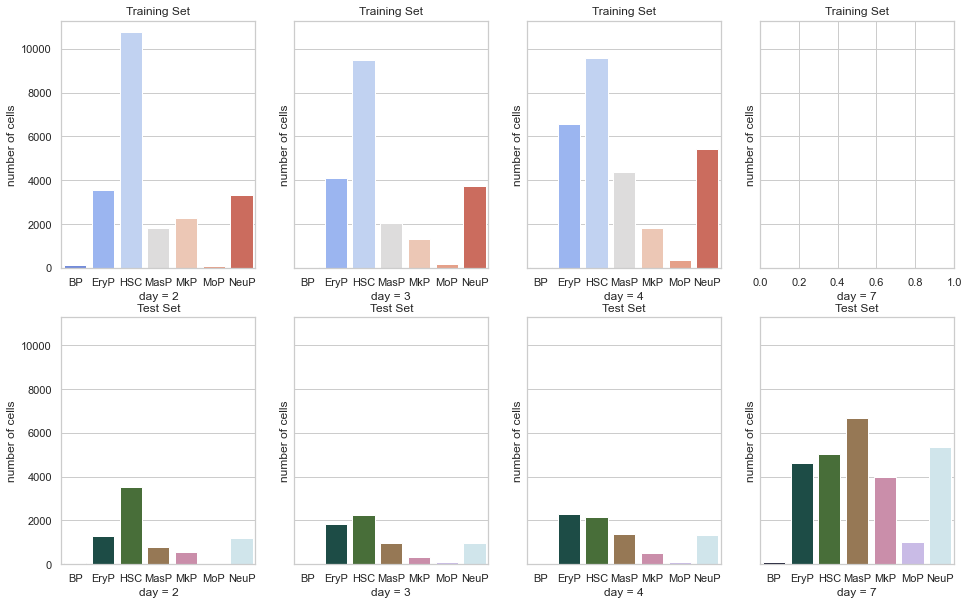

In [7]:
f, axs = plt.subplots(2, 4, figsize=(16, 10), sharey=True)

day_cell_type = train_df.set_index("cell_id")[["day", 'cell_type']].value_counts().to_frame()\
                .sort_values("cell_type").reset_index()\
                .rename(columns={0:"# cells"})

day_cell_type_2 = day_cell_type[day_cell_type['day'] == 2]
day_cell_type_3= day_cell_type[day_cell_type['day'] == 3]
day_cell_type_4 = day_cell_type[day_cell_type['day'] == 4]
day_cell_type_7 = day_cell_type[day_cell_type['day'] == 7]

sns.barplot(x=day_cell_type_2['cell_type'], y=day_cell_type_2['# cells'], palette="coolwarm", ax=axs[0][0])
axs[0][0].set_xlabel("day = 2")
axs[0][0].set_ylabel("number of cells")
axs[0][0].set_title("Training Set")

sns.barplot(x=day_cell_type_3['cell_type'], y=day_cell_type_3['# cells'], palette="coolwarm", ax=axs[0][1])
axs[0][1].set_xlabel("day = 3")
axs[0][1].set_ylabel("number of cells")
axs[0][1].set_title("Training Set")

sns.barplot(x=day_cell_type_4['cell_type'], y=day_cell_type_4['# cells'], palette="coolwarm", ax=axs[0][2])
axs[0][2].set_xlabel("day = 4")
axs[0][2].set_ylabel("number of cells")
axs[0][2].set_title("Training Set")

axs[0][3].set_xlabel("day = 7")
axs[0][3].set_ylabel("number of cells")
axs[0][3].set_title("Training Set")

day_cell_type = test_df.set_index("cell_id")[["day", 'cell_type']].value_counts().to_frame()\
                .sort_values("cell_type").reset_index()\
                .rename(columns={0:"# cells"})

day_cell_type_2 = day_cell_type[day_cell_type['day'] == 2]
day_cell_type_3= day_cell_type[day_cell_type['day'] == 3]
day_cell_type_4 = day_cell_type[day_cell_type['day'] == 4]
day_cell_type_7 = day_cell_type[day_cell_type['day'] == 7]

sns.barplot(x=day_cell_type_2['cell_type'], y=day_cell_type_2['# cells'], palette="cubehelix", ax=axs[1][0])
axs[1][0].set_xlabel("day = 2")
axs[1][0].set_ylabel("number of cells")
axs[1][0].set_title("Test Set")

sns.barplot(x=day_cell_type_3['cell_type'], y=day_cell_type_3['# cells'], palette="cubehelix", ax=axs[1][1])
axs[1][1].set_xlabel("day = 3")
axs[1][1].set_ylabel("number of cells")
axs[1][1].set_title("Test Set")

sns.barplot(x=day_cell_type_4['cell_type'], y=day_cell_type_4['# cells'], palette="cubehelix", ax=axs[1][2])
axs[1][2].set_xlabel("day = 4")
axs[1][2].set_ylabel("number of cells")
axs[1][2].set_title("Test Set")

sns.barplot(x=day_cell_type_7['cell_type'], y=day_cell_type_7['# cells'], palette="cubehelix", ax=axs[1][3])
axs[1][3].set_xlabel("day = 7")
axs[1][3].set_ylabel("number of cells")
axs[1][3].set_title("Test Set")

f.savefig('./image/2.0.png')

# Day vs Donor

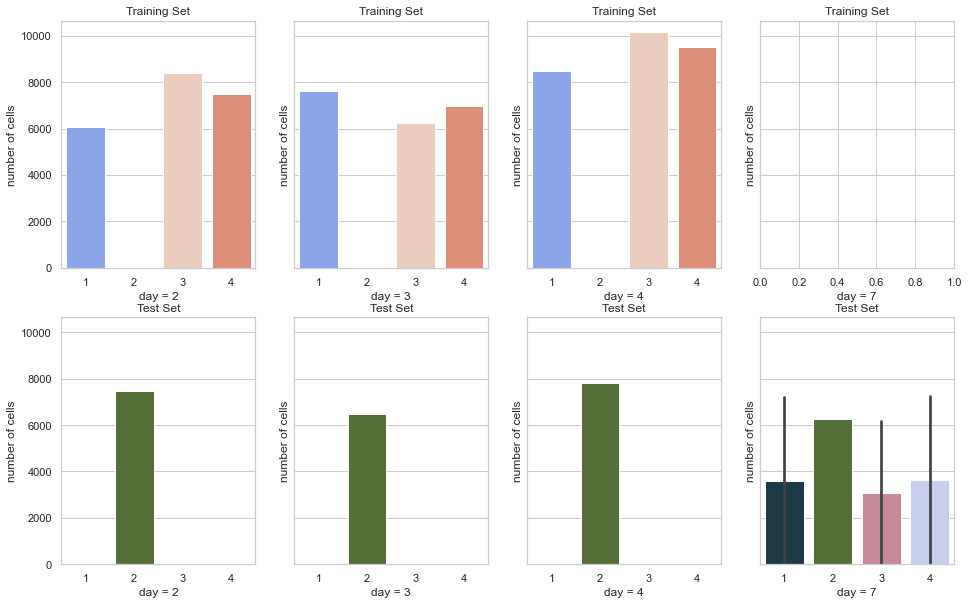

In [8]:
f, axs = plt.subplots(2, 4, figsize=(16, 10), sharey=True)

day_donor = train_df.set_index("cell_id")[["day", 'donor']].value_counts().to_frame()\
                .sort_values("donor").reset_index()\
                .rename(columns={0:"# cells"})

day_donor_2 = day_donor[day_donor['day'] == 2]
day_donor_3 = day_donor[day_donor['day'] == 3]
day_donor_4 = day_donor[day_donor['day'] == 4]
day_donor_7 = day_donor[day_donor['day'] == 7]
df_empty_2 = pd.DataFrame({'day': [2, 3, 4],
                    'donor' : [2, 2, 2],
                    '# cells' : [0 , 0, 0]})

day_donor_2 = pd.concat([day_donor_2, df_empty_2], ignore_index = True, axis = 0)
day_donor_3 = pd.concat([day_donor_3, df_empty_2], ignore_index = True, axis = 0)
day_donor_4 = pd.concat([day_donor_4, df_empty_2], ignore_index = True, axis = 0)


sns.barplot(x=day_donor_2['donor'], y=day_donor_2['# cells'], palette="coolwarm", ax=axs[0][0])
axs[0][0].set_xlabel("day = 2")
axs[0][0].set_ylabel("number of cells")
axs[0][0].set_title("Training Set")

sns.barplot(x=day_donor_3['donor'], y=day_donor_3['# cells'], palette="coolwarm", ax=axs[0][1])
axs[0][1].set_xlabel("day = 3")
axs[0][1].set_ylabel("number of cells")
axs[0][1].set_title("Training Set")

sns.barplot(x=day_donor_4['donor'], y=day_donor_4['# cells'], palette="coolwarm", ax=axs[0][2])
axs[0][2].set_xlabel("day = 4")
axs[0][2].set_ylabel("number of cells")
axs[0][2].set_title("Training Set")

axs[0][3].set_xlabel("day = 7")
axs[0][3].set_ylabel("number of cells")
axs[0][3].set_title("Training Set")


day_donor = test_df.set_index("cell_id")[["day", 'donor']].value_counts().to_frame()\
                .sort_values("donor").reset_index()\
                .rename(columns={0:"# cells"})

day_donor_2 = day_donor[day_donor['day'] == 2]
day_donor_3 = day_donor[day_donor['day'] == 3]
day_donor_4 = day_donor[day_donor['day'] == 4]
day_donor_7 = day_donor[day_donor['day'] == 7]
df_empty_2 = pd.DataFrame({'day': [2, 3, 4],
                    'donor' : [1, 3, 4],
                    '# cells' : [0 , 0, 0]})

day_donor_2 = pd.concat([day_donor_2, df_empty_2], ignore_index = True, axis = 0)
day_donor_3 = pd.concat([day_donor_3, df_empty_2], ignore_index = True, axis = 0)
day_donor_4 = pd.concat([day_donor_4, df_empty_2], ignore_index = True, axis = 0)
day_donor_7 = pd.concat([day_donor_7, df_empty_2], ignore_index = True, axis = 0)

sns.barplot(x=day_donor_2['donor'], y=day_donor_2['# cells'], palette="cubehelix", ax=axs[1][0])
axs[1][0].set_xlabel("day = 2")
axs[1][0].set_ylabel("number of cells")
axs[1][0].set_title("Test Set")

sns.barplot(x=day_donor_3['donor'], y=day_donor_3['# cells'], palette="cubehelix", ax=axs[1][1])
axs[1][1].set_xlabel("day = 3")
axs[1][1].set_ylabel("number of cells")
axs[1][1].set_title("Test Set")

sns.barplot(x=day_donor_4['donor'], y=day_donor_4['# cells'], palette="cubehelix", ax=axs[1][2])
axs[1][2].set_xlabel("day = 4")
axs[1][2].set_ylabel("number of cells")
axs[1][2].set_title("Test Set")

sns.barplot(x=day_donor_7['donor'], y=day_donor_7['# cells'], palette="cubehelix", ax=axs[1][3])
axs[1][3].set_xlabel("day = 7")
axs[1][3].set_ylabel("number of cells")
axs[1][3].set_title("Test Set")

f.savefig('./image/3.0.png')

# Donor vs Cell Type

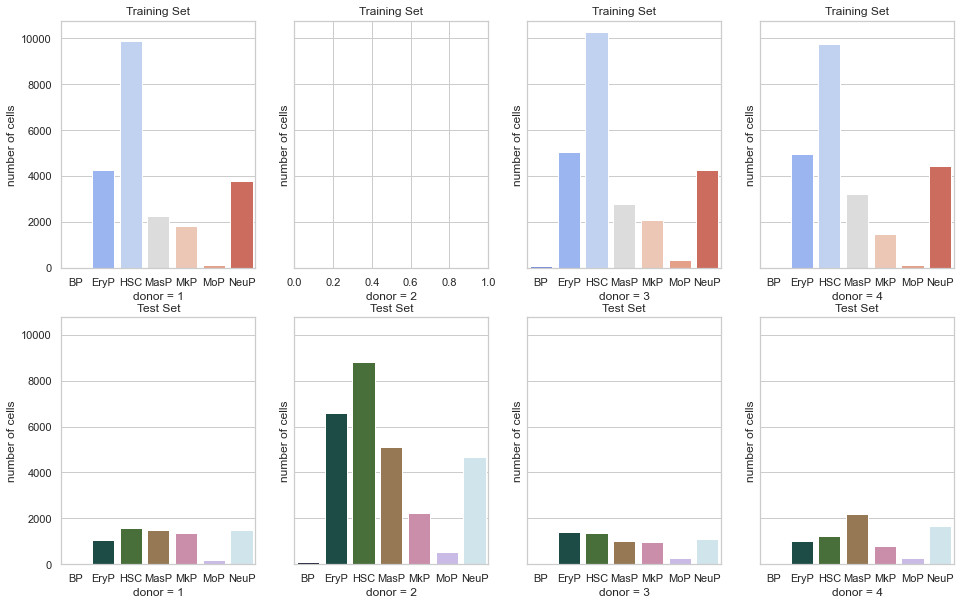

In [9]:
f, axs = plt.subplots(2, 4, figsize=(16, 10), sharey=True)

donor_cell_type = train_df.set_index("cell_id")[["donor", 'cell_type']].value_counts().to_frame()\
                .sort_values("cell_type").reset_index()\
                .rename(columns={0:"# cells"})
donor_cell_type_1 = donor_cell_type[donor_cell_type['donor'] == 1]
donor_cell_type_2 = donor_cell_type[donor_cell_type['donor'] == 2]
donor_cell_type_3 = donor_cell_type[donor_cell_type['donor'] == 3]
donor_cell_type_4 = donor_cell_type[donor_cell_type['donor'] == 4]

sns.barplot(x=donor_cell_type_1['cell_type'], y=donor_cell_type_1['# cells'], palette='coolwarm', ax=axs[0][0])
axs[0][0].set_xlabel("donor = 1")
axs[0][0].set_ylabel("number of cells")
axs[0][0].set_title("Training Set")

axs[0][1].set_xlabel("donor = 2")
axs[0][1].set_ylabel("number of cells")
axs[0][1].set_title("Training Set")

sns.barplot(x=donor_cell_type_3['cell_type'], y=donor_cell_type_3['# cells'], palette="coolwarm", ax=axs[0][2])
axs[0][2].set_xlabel("donor = 3")
axs[0][2].set_ylabel("number of cells")
axs[0][2].set_title("Training Set")

sns.barplot(x=donor_cell_type_4['cell_type'], y=donor_cell_type_4['# cells'], palette="coolwarm", ax=axs[0][3])
axs[0][3].set_xlabel("donor = 4")
axs[0][3].set_ylabel("number of cells")
axs[0][3].set_title("Training Set")

donor_cell_type = test_df.set_index("cell_id")[["donor", 'cell_type']].value_counts().to_frame()\
                .sort_values("cell_type").reset_index()\
                .rename(columns={0:"# cells"})

donor_cell_type_1 = donor_cell_type[donor_cell_type['donor'] == 1]
donor_cell_type_2 = donor_cell_type[donor_cell_type['donor'] == 2]
donor_cell_type_3 = donor_cell_type[donor_cell_type['donor'] == 3]
donor_cell_type_4 = donor_cell_type[donor_cell_type['donor'] == 4]
sns.barplot(x=donor_cell_type_1['cell_type'], y=donor_cell_type_1['# cells'], palette='cubehelix', ax=axs[1][0])
axs[1][0].set_xlabel("donor = 1")
axs[1][0].set_ylabel("number of cells")
axs[1][0].set_title("Test Set")

sns.barplot(x=donor_cell_type_2['cell_type'], y=donor_cell_type_2['# cells'], palette='cubehelix', ax=axs[1][1])
axs[1][1].set_xlabel("donor = 2")
axs[1][1].set_ylabel("number of cells")
axs[1][1].set_title("Test Set")

sns.barplot(x=donor_cell_type_3['cell_type'], y=donor_cell_type_3['# cells'], palette="cubehelix", ax=axs[1][2])
axs[1][2].set_xlabel("donor = 3")
axs[1][2].set_ylabel("number of cells")
axs[1][2].set_title("Test Set")

sns.barplot(x=donor_cell_type_4['cell_type'], y=donor_cell_type_4['# cells'], palette="cubehelix", ax=axs[1][3])
axs[1][3].set_xlabel("donor = 4")
axs[1][3].set_ylabel("number of cells")
axs[1][3].set_title("Test Set")
f.savefig('./image/4.0.png')